In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Bloco 1 - K-Means tradicional com distância Euclidiana
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
# Bloco 2 - K-Means com distância DTW (tslearn)
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
# Bloco 3 - Hierarchical Clustering com DTW
from scipy.cluster.hierarchy import linkage, fcluster
from tslearn.metrics import cdist_dtw
# Bloco 4 - DBA-KMeans (K-Means com DTW Barycenter Averaging)
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import seaborn as sns

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tslearn.metrics import dtw

In [10]:
df = pd.read_csv('Metricas.csv')

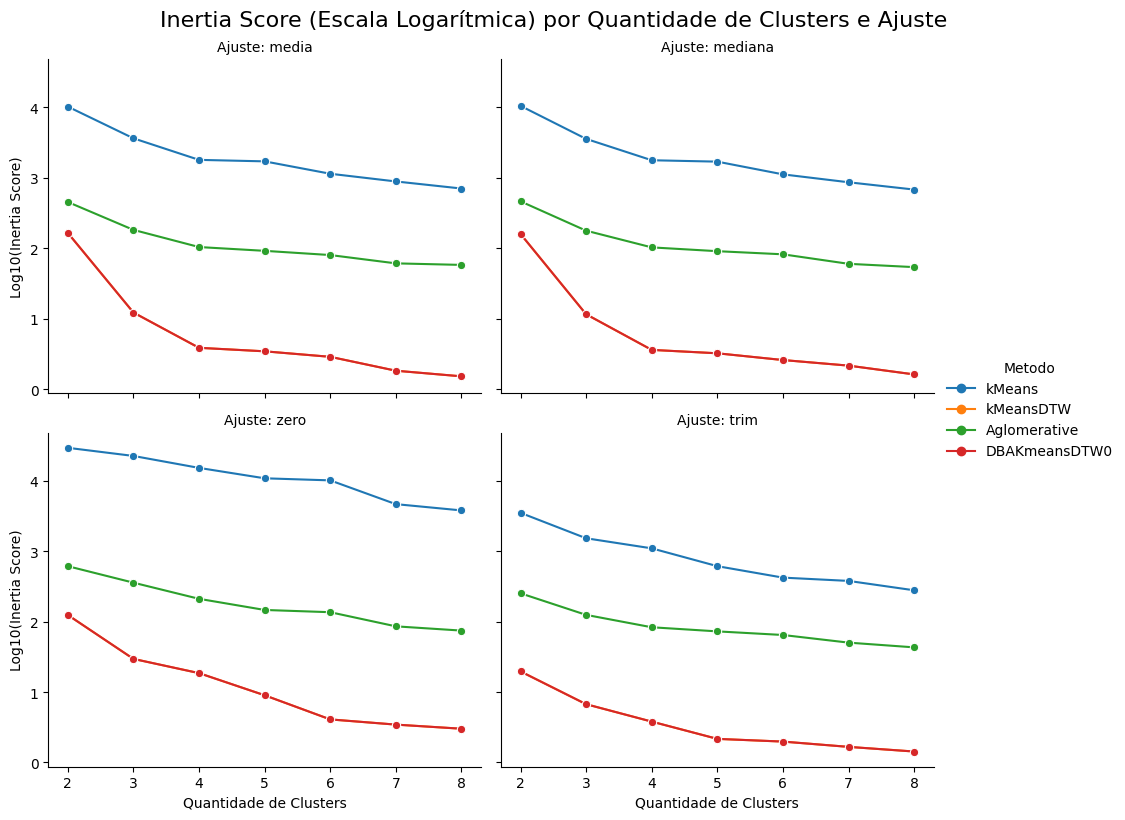

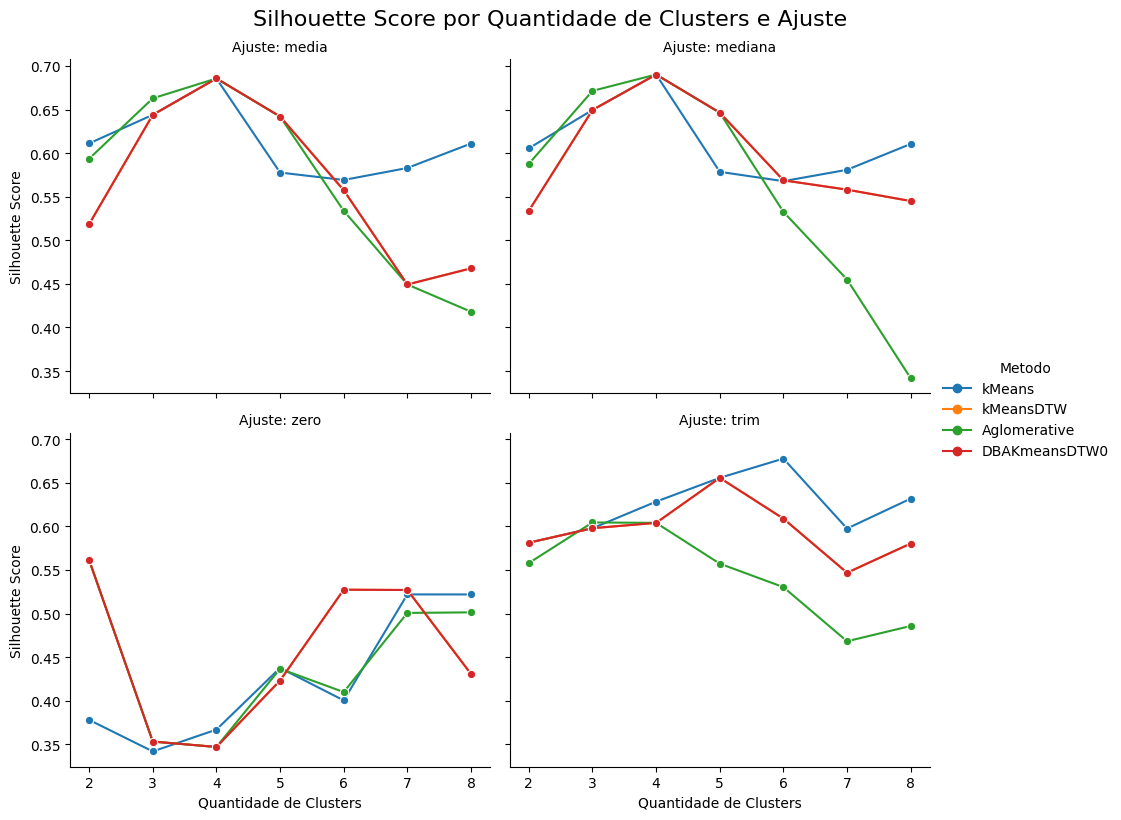

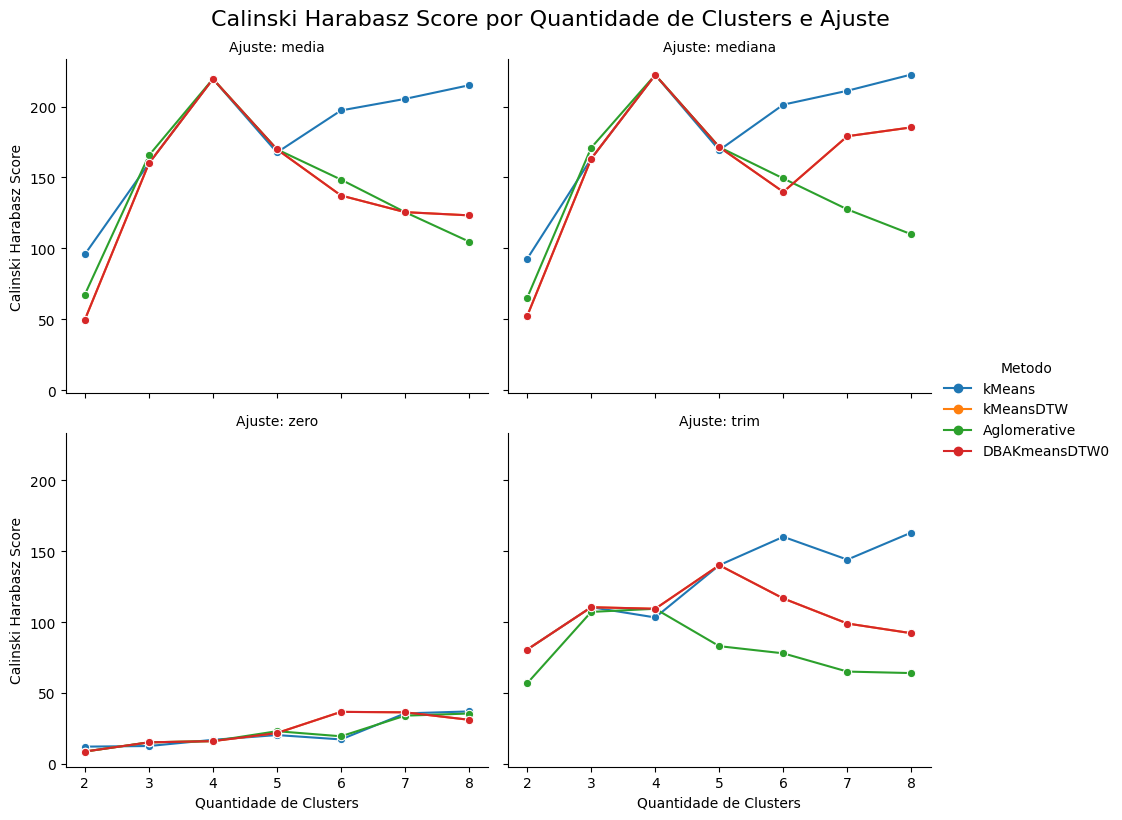

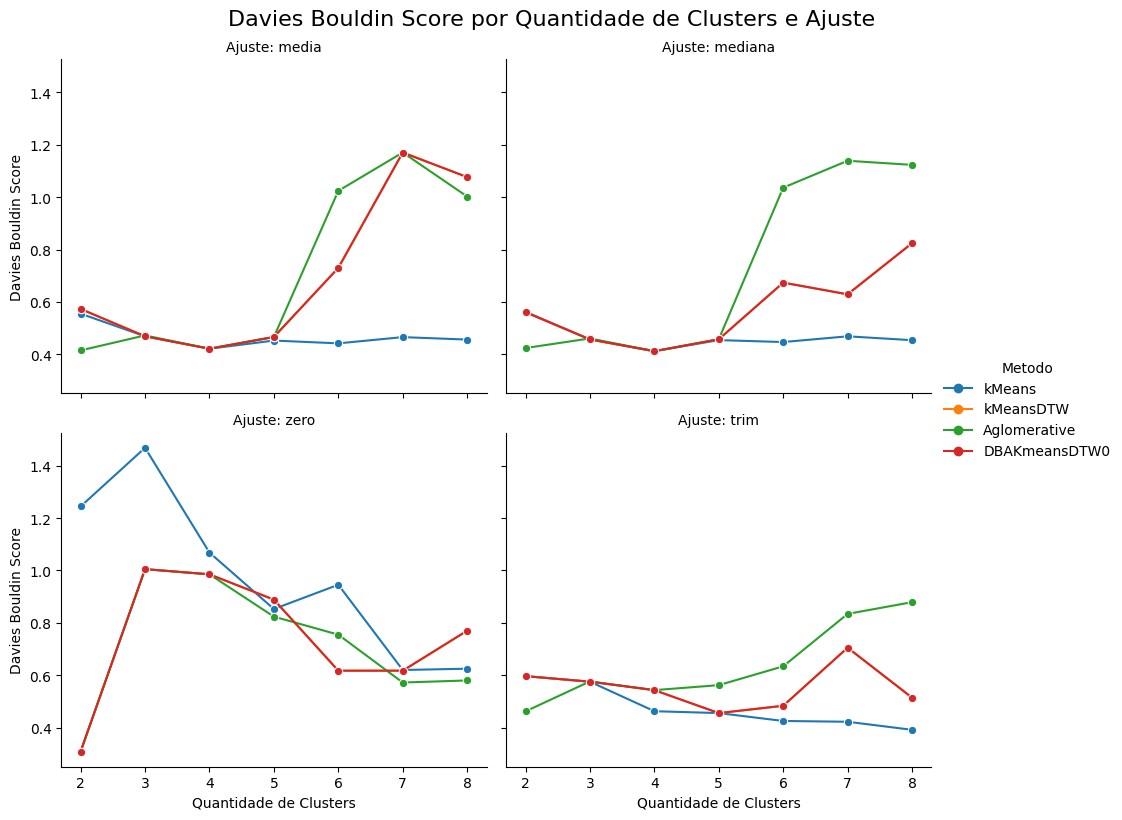

In [11]:
# Apenas para a métrica 'Inertia_Score'
metric_to_plot = 'Inertia_Score'

# Criar um novo DataFrame para plotagem com a coluna logarítmica
# Adiciona um pequeno valor para evitar log(0) caso haja valores muito pequenos ou zero
df_plot = df.copy()
df_plot[metric_to_plot + '_Log'] = np.log10(df_plot[metric_to_plot] + 1e-6) # Adicionando um pequeno valor para evitar log(0) e usando log base 10


# Criar o plot da inércia com escala logarítmica
g = sns.relplot(data=df_plot,
                x='Quantidade_Clusters',
                y=metric_to_plot + '_Log', # Usamos a nova coluna logarítmica
                col='Ajuste',
                hue='Metodo',
                kind='line',
                marker='o',
                height=4,
                aspect=1.2,
                col_wrap=2)

# Definir os rótulos dos eixos e títulos
g.set_axis_labels("Quantidade de Clusters", f"Log10({metric_to_plot.replace('_', ' ')})")
g.set_titles("Ajuste: {col_name}")
g.fig.suptitle(f'{metric_to_plot.replace("_", " ")} (Escala Logarítmica) por Quantidade de Clusters e Ajuste', y=1.02, fontsize=16)

plt.show()

# Opcionalmente, você pode gerar todos os outros gráficos não-inércia como antes,
# para manter a visualização padrão para eles.
# Ou pode incluir a lógica abaixo no loop principal e adicionar uma condicional
# para aplicar o logaritmo apenas para a inércia.

other_metrics = [m for m in ['Silhouette_Score', 'Calinski_Harabasz_Score', 'Davies_Bouldin_Score'] if m != metric_to_plot]

for metric in other_metrics:
    g = sns.relplot(data=df,
                    x='Quantidade_Clusters',
                    y=metric,
                    col='Ajuste',
                    hue='Metodo',
                    kind='line',
                    marker='o',
                    height=4,
                    aspect=1.2,
                    col_wrap=2)
    
    g.set_axis_labels("Quantidade de Clusters", metric.replace('_', ' '))
    g.set_titles("Ajuste: {col_name}")
    g.fig.suptitle(f'{metric.replace("_", " ")} por Quantidade de Clusters e Ajuste', y=1.02, fontsize=16)
    plt.show()